# Predict the number of clusters and represent it visually.

In [1]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


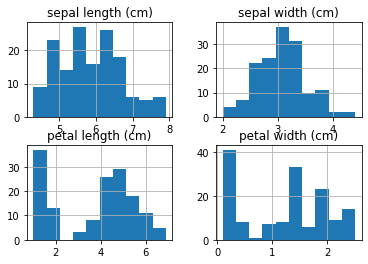

In [20]:
# plot every columns
df.hist()
plt.show()

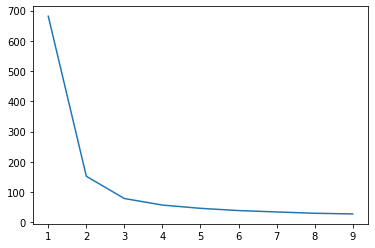

In [14]:
# K Means Clustering
# How many cluster

from sklearn.cluster import KMeans

centroids_list = []
num_clusters = range(1, 10)

for i in num_clusters:
  Kmeans = KMeans(i)
  Kmeans.fit(df.values)
  centroids_list.append(Kmeans.inertia_)

plt.plot(num_clusters, centroids_list)
plt.show()


This is an elbow plot. When average distance of centroids doesn't decrease significantly with every iteration, we can chose optimum number of clusters, Here the elbow is at k=3.

In [15]:
# prediction
Kmeans = KMeans(3)
centroid = Kmeans.fit_predict(df.values)
centroid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

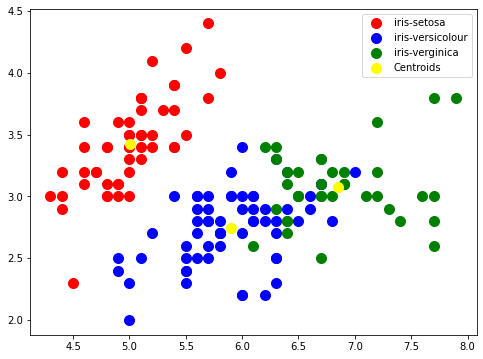

In [25]:
# Plot the prediction
plt.figure(figsize=(8, 6))
plt.scatter(df.values[centroid == 0, 0],  df.values[centroid == 0, 1], s = 100, c = "red", label = "iris-setosa")
plt.scatter(df.values[centroid == 1, 0],  df.values[centroid == 1, 1], s = 100, c = "blue", label = "iris-versicolour")
plt.scatter(df.values[centroid == 2, 0],  df.values[centroid == 2, 1], s = 100, c = "green", label = "iris-verginica")

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
